# Instituto de Educação Superior de Brası́lia – IESB
## Pós-Graduação em Inteligência Artificial
### Aprendizagem Supervisionada

### Atividade 1 - Regressão Linear Simples

#### Aluno: Henrique Brandão

#### Descrição da atividade

No começo do século XX, Karl Pearson realizou um experimento cujo objetivo era determinar se existe correlação entre a altura de um filho e de seu pai.

O dataset **alturas.txt** contém informações de alturas de pais e de filhos, medidas em polegadas (inch).

Cada linha corresponde a uma amostra, onde os valores de alturas estão separados por uma tabulação ("\t").

Faça o que se pede:

### 1 - Carregue o dataset, converta as unidades de polegadas (inch) para centimetros (cm), e separe em atributo descritivo (altura do pai, x), e atributo alvo (altura do filho, y).

In [1]:
import pandas as pd

In [2]:
!ls

 alturas.csv  'Atividade 1 - Regressão Linear.ipynb'


In [3]:
!wc -l alturas.csv

1079 alturas.csv


In [4]:
df = pd.read_csv('alturas.csv', delimiter='\t')
df.shape

(1078, 2)

In [5]:
df.head()

,Pai,Filho
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


In [6]:
def inc_to_cm(x):
    return x * 2.54

In [7]:
df['x'] = df['Pai'].apply(inc_to_cm)

In [8]:
df['y'] = df['Filho'].apply(inc_to_cm)

In [9]:
df.head()

,Pai,Filho,x,y
0,65.0,59.8,165.100,151.892
1,63.3,63.2,160.782,160.528
2,65.0,63.3,165.100,160.782
3,65.8,62.8,167.132,159.512
4,61.1,64.3,155.194,163.322


In [10]:
desc = df[['x', 'y']].describe()
desc

,x,y
count,1078.000000,1078.000000
mean,171.924542,174.457944
std,6.974401,7.153133
min,149.860000,148.590000
25%,167.132000,169.926000
50%,172.212000,174.244000
75%,176.784000,179.070000
max,191.516000,199.136000


In [11]:
_min_x = int(desc['x']['min'])
_max_x = int(desc['x']['max'])

_min_x, _max_x

(149, 191)

### 2 - Apresente um diagrama de dispersão de todas as amostras. Indique nos eixos as variáveis e suas unidades.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [13]:
diagonal = [(x, x) for x in list(range(_min_x, _max_x+1))]

<IPython.core.display.Javascript object>


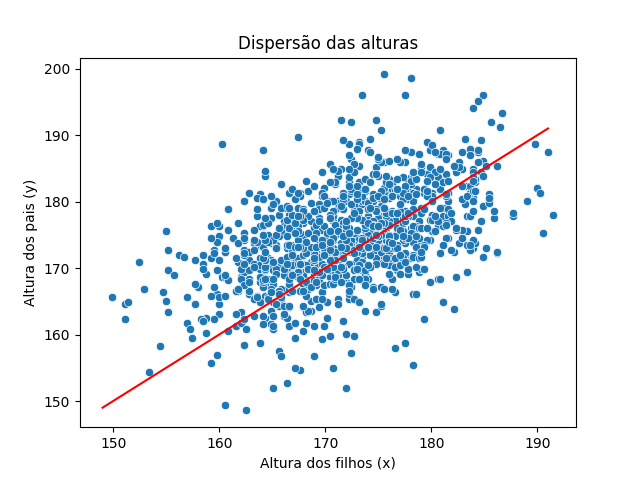

In [14]:
sns.scatterplot(data=df, x='x', y='y')
plt.title('Dispersão das alturas')
plt.xlabel('Altura dos filhos (x)')
plt.ylabel('Altura dos pais (y)')
sns.lineplot(x=[p[0] for p in diagonal], y=[p[1] for p in diagonal], color='red')
plt.show()

### 3 - Divida o dataset (aleatoriamente e embaralhado) em dois conjuntos: um de treino e outro de teste. Utilize 30% do total para a base de teste.

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

In [16]:
X, Y = np.array(df['x']).reshape(-1, 1), df['y']

X.shape, Y.shape

((1078, 1), (1078,))

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y,
                                                test_size=0.3,
                                                random_state=42,
                                                shuffle=True)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((754, 1), (754,), (324, 1), (324,))

### 4 - Implemente um modelo de regressão linear com a base de treino.

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(xtrain, ytrain)

LinearRegression()

In [21]:
pred = model.predict(xtest)

### 5 - Apresente os parâmetros do modelo treinado.

In [22]:
model.coef_, model.intercept_

(array([0.52069683]), 84.99292304244307)

### 6 - Crie um novo diagrama de dispersão, porém agora separando (por cor ou símbolo) as amostras de treinamento das de teste.  Nesse mesmo gráfico, plote a reta com os parâmetros obtidos do modelo treinado.

In [23]:
def linreg(x):
    """f(x) = ax + b"""
    return model.coef_ * x + model.intercept_

In [24]:
# avaliação manual
len([y for y in (pred - np.array([linreg(x)[0] for x in xtest])) if y != 0])

0

In [25]:
r = range(_min_x, _max_x)
f = [linreg(x)[0] for x in r]

<IPython.core.display.Javascript object>


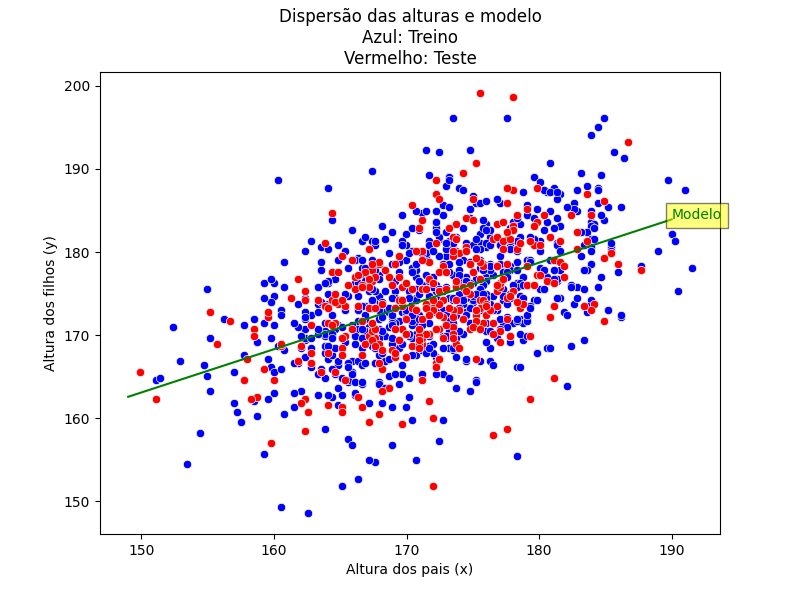

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=xtrain[:,0], y=ytrain, color='blue')
sns.scatterplot(x=xtest[:,0], y=ytest, color='red')
sns.lineplot(x=r, y=f, color='green')
plt.title('Dispersão das alturas e modelo\nAzul: Treino\nVermelho: Teste')
plt.xlabel('Altura dos pais (x)')
plt.ylabel('Altura dos filhos (y)')
plt.text(x=r[-1], y=f[-1], s='Modelo',
        fontdict=dict(color='green',size=10),
         bbox=dict(facecolor='yellow',alpha=0.5))
plt.show()

### 7 - Calcule o coeficiente de determinação ($R^{2}$) para as duas bases.

In [31]:
score_train = model.score(xtrain, ytrain)
score_train

0.2619954969964504

In [32]:
score_teste = model.score(xtest, ytest)
score_teste

0.22114194589238356